<a href="https://colab.research.google.com/github/Chandrakanth9394/DATA-SCIENCE-LAB/blob/main/knn_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
dataset=pd.read_csv('/content/Mall_Customers.csv')


In [14]:

dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [20]:
scaler.fit(dataset.drop('Gender',axis=1))

StandardScaler()

In [21]:
dataset.columns[:-1]

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)'], dtype='object')

In [24]:
scaled_features=scaler.transform(dataset.drop('Gender',axis=1))

In [26]:
scaled_features

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [27]:
new_dataset=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
                                              


In [29]:
from sklearn.model_selection import train_test_split
X=new_dataset
y=dataset['Gender']


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred=knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[22 14]
 [13 11]]
              precision    recall  f1-score   support

      Female       0.63      0.61      0.62        36
        Male       0.44      0.46      0.45        24

    accuracy                           0.55        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.55      0.55      0.55        60



In [38]:
#Analyzing better k value through iterations
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error rate')

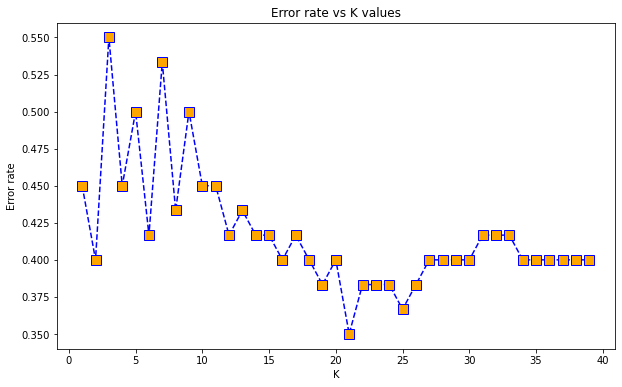

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
         marker='s',markerfacecolor='orange',markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('K')
plt.ylabel('Error rate')

In [40]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))




[[20 16]
 [17  7]]
              precision    recall  f1-score   support

      Female       0.54      0.56      0.55        36
        Male       0.30      0.29      0.30        24

    accuracy                           0.45        60
   macro avg       0.42      0.42      0.42        60
weighted avg       0.45      0.45      0.45        60

